## Importing the Libraries

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# Running pre-processing file
%run directory.ipynb

## Defining Training Images

In [5]:
img_height = 64
img_width = 64
batch_size = 4
nb_epochs = 10

In [6]:
TRAINING_DIR = "tmp"

train_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=False,
                validation_split=0.2)
train_set = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

Found 2728 images belonging to 62 classes.


### Plotting some training images

In [15]:
plt.imshow(train_set)

ValueError: could not broadcast input array from shape (4,64,64,3) into shape (4)

## Defining Validation Images

In [79]:
validation_set = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 682 images belonging to 62 classes.


## Designing Model

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=62, activation='softmax'),
    #tf.keras.layers.Flatten()
])

In [85]:
model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics= tf.keras.metrics.CategoricalAccuracy())

In [86]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)             

## Fitting on Model

In [87]:
history = model.fit_generator(
    train_set,
    steps_per_epoch = train_set.samples // batch_size,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/10
682/682 [==============================] - 30s 44ms/step - loss: 3.0944 - categorical_accuracy: 0.2350 - val_loss: 1.9434 - val_categorical_accuracy: 0.4912
Epoch 2/10
682/682 [==============================] - 30s 44ms/step - loss: 1.1671 - categorical_accuracy: 0.6661 - val_loss: 1.7101 - val_categorical_accuracy: 0.5294
Epoch 3/10
682/682 [==============================] - 29s 43ms/step - loss: 0.7061 - categorical_accuracy: 0.7753 - val_loss: 1.4877 - val_categorical_accuracy: 0.6353
Epoch 4/10
682/682 [==============================] - 30s 44ms/step - loss: 0.4872 - categorical_accuracy: 0.8376 - val_loss: 1.4442 - val_categorical_accuracy: 0.6426
Epoch 5/10
682/682 [==============================] - 29s 43ms/step - loss: 0.3774 - categorical_accuracy: 0.8746 - val_loss: 1.4418 - val_categorical_accuracy: 0.6574
Epoch 6/10
682/682 [==============================] - 30s 44ms/step - loss: 0.2795 - categorical_accuracy: 0.9054 - val_loss: 1.5068 - val_categorical_accuracy:

## Evaluating on Training Set

In [72]:
results = model.evaluate(train_set, verbose=0)

In [73]:
results

[0.09816358238458633, 0.9688416719436646]

## Plotting the result

Text(0.5, 1.0, 'Training and validation loss')

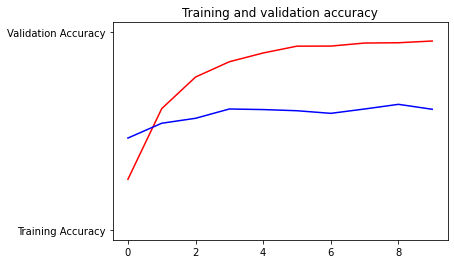

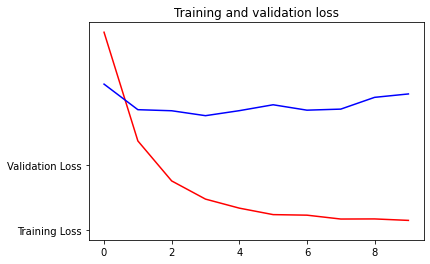

In [74]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')